# Centrality measurement

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

In [3]:
nx.__version__

'3.1'

In [725]:
# Create graph object
G = nx.read_graphml('london.graph.xml')


In [53]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

75
__ne__
__repr__
degree
adj
is_multigraph
adjlist_outer_dict_factory
adjlist_outer_dict_factory
__len__
adjlist_outer_dict_factory
graph_attr_dict_factory


In [54]:
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [671]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()

for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

### Topological Centrality

In [726]:
#compute the degree centrality
deg_london = nx.degree_centrality(G)

nx.set_node_attributes(G, dict(deg_london), 'degree')

# To dataframe using the nodes as the index

deg_G = pd.DataFrame(index=G.nodes())
deg_G['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

deg_G.sort_values(["degree"], ascending=False)[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [727]:
#compute the eigenvector centrality
eig_london = nx.eigenvector_centrality_numpy(G)

nx.set_node_attributes(G, dict(eig_london), 'eigenvector')

# To dataframe using the nodes as the index

eig_G = pd.DataFrame(index=G.nodes())
eig_G['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))

eig_G.sort_values("eigenvector", ascending=False)[0:10]

,eigenvector
Bank and Monument,0.383725
Liverpool Street,0.329191
Stratford,0.269574
Waterloo,0.249708
Moorgate,0.215343
Green Park,0.197023
Oxford Circus,0.183441
Tower Hill,0.171839
Westminster,0.168368
Shadwell,0.159233


In [728]:
#compute the betweenness centrality
bet_london = nx.betweenness_centrality(G, normalized=True, seed=100)

nx.set_node_attributes(G, dict(bet_london), 'betweenness')

# To dataframe using the nodes as the index

bet_G = pd.DataFrame(index=G.nodes())
bet_G['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

bet_G.sort_values("betweenness", ascending=False)[0:10]

,betweenness
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


In [675]:
data = {'Efficiency_deg': [], 'Efficiency_eig': [], 'Efficiency_bet': [],
         'LargestC_deg': [], 'LargestC_eig': [], 'LargestC_bet': []}

In [745]:
# create drop list
deg_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
eig_sorted = sorted(eig_london.items(), key=itemgetter(1), reverse=True)
bet_sorted = sorted(bet_london.items(), key=itemgetter(1), reverse=True)

sorted_ten_deg=[e for e,v in deg_sorted[:10]]
sorted_ten_eig=[e for e,v in eig_sorted[:10]]
sorted_ten_bet=[e for e,v in bet_sorted[:10]]



# Removal strategy A
df_A = pd.DataFrame(data)
Gt_A = G.copy()

eff_list_deg = []
eff_list_eig = []
eff_list_bet = []
lar_c_deg = []
lar_c_eig = []
lar_c_bet = []

# For the degree centrality
print('the loop for degree centrality: ')
for i in range(10):
      if i == 0: # store the origin glob eff and largest component
            efficiency = nx.global_efficiency(Gt_A)
            Subg = [Gt_A.subgraph(c).copy() for c in nx.connected_components(Gt_A)]
            c = max([len(subgraph.nodes) for subgraph in Subg])
      
            eff_list_deg.append(efficiency)
            lar_c_deg.append(c)


      Gt_A.remove_node(sorted_ten_deg[i])
      # calculate the glob eff
      efficiency = nx.global_efficiency(Gt_A)

      # update DataFrame
      eff_list_deg.append(efficiency)

      # calculate the largest component
      # Subg = [Gt_A.subgraph(c).copy() for c in nx.connected_components(Gt_A)]
      # c = max([len(subgraph.nodes) for subgraph in Subg])
      components = nx.connected_components(Gt_A)
      # Use the max() command to find the largest one:
      largest_component = max(components, key=len)
      # Create a "subgraph" of the largest component
      Largest_subgraph = Gt_A.subgraph(largest_component)
      c = Largest_subgraph.number_of_nodes()
      lar_c_deg.append(c)

      print('removed node is ' + sorted_ten_deg[i])
      print('largest component is ' + str(c))


print('\nthe loop for eig centrality')
# renew the map
Gt_A = G.copy()
for i in range(10):
      if i == 0: # store the origin glob eff and largest component
            efficiency = nx.global_efficiency(Gt_A)
            Subg = [Gt_A.subgraph(c).copy() for c in nx.connected_components(Gt_A)]
            c = max([len(subgraph.nodes) for subgraph in Subg])
      
            eff_list_eig.append(efficiency)
            lar_c_eig.append(c)

      Gt_A.remove_node(sorted_ten_eig[i]) ##
      # calculate the glob eff
      efficiency = nx.global_efficiency(Gt_A)

      # update DataFrame
      eff_list_eig.append(efficiency) ##

      # calculate the largest component
      # Subg = [Gt_A.subgraph(c).copy() for c in nx.connected_components(Gt_A)]
      # c = max([len(subgraph.nodes) for subgraph in Subg])
      components = nx.connected_components(Gt_A)
      # Use the max() command to find the largest one:
      largest_component = max(components, key=len)
      # Create a "subgraph" of the largest component
      Largest_subgraph = Gt_A.subgraph(largest_component)
      c = Largest_subgraph.number_of_nodes()

      lar_c_eig.append(c) ##

      print('removed node is ' + sorted_ten_eig[i]) ##
      print('largest component is ' + str(c))

print('\nthe loop for bet centrality')
# renew the map
Gt_A = G.copy()
for i in range(10):
      if i == 0: # store the origin glob eff and largest component
            efficiency = nx.global_efficiency(Gt_A)
            Subg = [Gt_A.subgraph(c).copy() for c in nx.connected_components(Gt_A)]
            c = max([len(subgraph.nodes) for subgraph in Subg])
      
            eff_list_bet.append(efficiency)
            lar_c_bet.append(c)

      Gt_A.remove_node(sorted_ten_bet[i]) ##
      # calculate the glob eff
      efficiency = nx.global_efficiency(Gt_A)

      # update DataFrame
      eff_list_bet.append(efficiency) ##

      # calculate the largest component
      # Subg = [Gt_A.subgraph(c).copy() for c in nx.connected_components(Gt_A)]
      # c = max([len(subgraph.nodes) for subgraph in Subg])
      components = nx.connected_components(Gt_A)
      # Use the max() command to find the largest one:
      largest_component = max(components, key=len)
      # Create a "subgraph" of the largest component
      Largest_subgraph = Gt_A.subgraph(largest_component)
      c = Largest_subgraph.number_of_nodes()

      lar_c_bet.append(c) ##

      print('removed node is ' + sorted_ten_bet[i]) ##
      print('largest component is ' + str(c))



df_A['Efficiency_deg'] = np.round(eff_list_deg, 7)
df_A['Efficiency_eig'] = np.round(eff_list_eig, 7)
df_A['Efficiency_bet'] = np.round(eff_list_bet, 7)
df_A['LargestC_deg'] = lar_c_deg
df_A['LargestC_eig'] = lar_c_eig
df_A['LargestC_bet'] = lar_c_bet

df_A

the loop for degree centrality: 
removed node is Stratford
largest component is 379
removed node is Bank and Monument
largest component is 378
removed node is Baker Street
largest component is 377
removed node is King's Cross St. Pancras
largest component is 374
removed node is West Ham
largest component is 371
removed node is Canning Town
largest component is 356
removed node is Waterloo
largest component is 355
removed node is Green Park
largest component is 354
removed node is Oxford Circus
largest component is 352
removed node is Liverpool Street
largest component is 346

the loop for eig centrality
removed node is Bank and Monument
largest component is 400
removed node is Liverpool Street
largest component is 399
removed node is Stratford
largest component is 377
removed node is Waterloo
largest component is 376
removed node is Moorgate
largest component is 375
removed node is Green Park
largest component is 374
removed node is Oxford Circus
largest component is 373
removed node i

,Efficiency_deg,Efficiency_eig,Efficiency_bet,LargestC_deg,LargestC_eig,LargestC_bet
0,0.101256,0.101256,0.101256,401,401,401
1,0.088917,0.096735,0.088917,379,400,379
2,0.085862,0.094668,0.085862,378,399,378
3,0.082033,0.084963,0.084963,377,377,377
4,0.075700,0.082797,0.078498,374,376,371
5,0.073022,0.082749,0.075942,371,375,370
6,0.068935,0.080953,0.074151,356,374,369
7,0.067219,0.080104,0.068206,355,373,346
8,0.066221,0.079741,0.067659,354,371,345
9,0.065362,0.079100,0.064700,352,370,342


In [738]:
df_A.to_csv('df_A.csv')

In [743]:
# Removal strategy B
# initialize the list
eff_list_deg = []
eff_list_eig = []
eff_list_bet = []
lar_c_deg = []
lar_c_eig = []
lar_c_bet = []

df_B = pd.DataFrame(data)
Gt_B = G.copy()
# For the degree centrality
print('the loop for degree centrality: ') ##
for i in range(10):
      if i == 0: # store the origin glob eff and largest component
            efficiency = nx.global_efficiency(Gt_B)
            Subg = [Gt_B.subgraph(c).copy() for c in nx.connected_components(Gt_B)]
            c = max([len(subgraph.nodes) for subgraph in Subg])
      
            eff_list_deg.append(efficiency)
            lar_c_deg.append(c)

      # re-compute the centrality
      deg_london_B = nx.degree_centrality(Gt_B) ##
      nx.set_node_attributes(Gt_B, dict(deg_london_B), 'degree') ##
      deg_sorted = sorted(deg_london_B.items(), key=itemgetter(1), reverse=True) ##

      # remove node based on new list
      Gt_B.remove_node(deg_sorted[0][0]) ##

      # calculate the glob eff
      efficiency = nx.global_efficiency(Gt_B)

      # calculate the largest component
      # Subg = [Gt_B.subgraph(c).copy() for c in nx.connected_components(Gt_B)]
      # c = max([len(subgraph.nodes) for subgraph in Subg])
      components = nx.connected_components(Gt_B)
      # Use the max() command to find the largest one:
      largest_component = max(components, key=len)
      # Create a "subgraph" of the largest component
      Largest_subgraph = Gt_B.subgraph(largest_component)
      c = Largest_subgraph.number_of_nodes()

      # update DataFrame
      eff_list_deg.append(efficiency)
      lar_c_deg.append(c)

      print('removed node is ' + deg_sorted[0][0])
      print('largest component is ' + str(c))

      


print('\nthe loop for eig centrality')
# renew the map
Gt_B = G.copy()
for i in range(10):
      if i == 0: # store the origin glob eff and largest component
            efficiency = nx.global_efficiency(Gt_B)
            Subg = [Gt_B.subgraph(c).copy() for c in nx.connected_components(Gt_B)]
            c = max([len(subgraph.nodes) for subgraph in Subg])
      
            eff_list_eig.append(efficiency)
            lar_c_eig.append(c)

      # re-compute the centrality
      eig_london_B = nx.eigenvector_centrality_numpy(Gt_B) ##
      nx.set_node_attributes(Gt_B, dict(eig_london_B), 'eigen') ##
      eig_sorted = sorted(eig_london_B.items(), key=itemgetter(1), reverse=True) ##

      # remove node based on new list
      Gt_B.remove_node(eig_sorted[0][0]) ##

      # calculate the glob eff
      efficiency = nx.global_efficiency(Gt_B)

      # calculate the largest component
      # Subg = [Gt_B.subgraph(c).copy() for c in nx.connected_components(Gt_B)]
      # c = max([len(subgraph.nodes) for subgraph in Subg])
      components = nx.connected_components(Gt_B)
      # Use the max() command to find the largest one:
      largest_component = max(components, key=len)
      # Create a "subgraph" of the largest component
      Largest_subgraph = Gt_B.subgraph(largest_component)
      c = Largest_subgraph.number_of_nodes()

      # update DataFrame
      eff_list_eig.append(efficiency)
      lar_c_eig.append(c)

      print('removed node is ' + eig_sorted[0][0])
      print('largest component is ' + str(c))


print('\nthe loop for bet centrality')
# renew the map
Gt_B = G.copy()
for i in range(10):
      if i == 0: # store the origin glob eff and largest component
            efficiency = nx.global_efficiency(Gt_B)
            Subg = [Gt_B.subgraph(c).copy() for c in nx.connected_components(Gt_B)]
            c = max([len(subgraph.nodes) for subgraph in Subg])
      
            eff_list_bet.append(efficiency)
            lar_c_bet.append(c)

      # re-compute the centrality
      bet_london_B = nx.betweenness_centrality(Gt_B) ##
      nx.set_node_attributes(Gt_B, dict(bet_london_B), 'bet') ##
      bet_sorted = sorted(bet_london_B.items(), key=itemgetter(1), reverse=True) ##

      # remove node based on new list
      Gt_B.remove_node(bet_sorted[0][0]) ##

      # calculate the glob eff
      efficiency = nx.global_efficiency(Gt_B)

      # calculate the largest component
      #Subg = [Gt_B.subgraph(c).copy() for c in nx.connected_components(Gt_B)]
      #c = max([len(subgraph.nodes) for subgraph in Subg])
      # Get the list of components:
      components = nx.connected_components(Gt_B)
      # Use the max() command to find the largest one:
      largest_component = max(components, key=len)
      # Create a "subgraph" of the largest component
      Largest_subgraph = Gt_B.subgraph(largest_component)
      c = Largest_subgraph.number_of_nodes()

      # update DataFrame
      eff_list_bet.append(efficiency)
      lar_c_bet.append(c)

      print('removed node is ' + bet_sorted[0][0])
      print('largest component is ' + str(c))



df_B['Efficiency_deg'] = np.round(eff_list_deg, 7)
df_B['Efficiency_eig'] = np.round(eff_list_eig, 7)
df_B['Efficiency_bet'] = np.round(eff_list_bet, 7)
df_B['LargestC_deg'] = lar_c_deg
df_B['LargestC_eig'] = lar_c_eig
df_B['LargestC_bet'] = lar_c_bet

df_B

the loop for degree centrality: 
removed node is Stratford
largest component is 379
removed node is Bank and Monument
largest component is 378
removed node is Baker Street
largest component is 377
removed node is King's Cross St. Pancras
largest component is 374
removed node is Canning Town
largest component is 360
removed node is Green Park
largest component is 359
removed node is Earl's Court
largest component is 358
removed node is Waterloo
largest component is 357
removed node is Oxford Circus
largest component is 355
removed node is Willesden Junction
largest component is 341

the loop for eig centrality
removed node is Bank and Monument
largest component is 400
removed node is Oxford Circus
largest component is 399
removed node is Stratford
largest component is 377
removed node is Earl's Court
largest component is 376
removed node is Westminster
largest component is 375
removed node is Baker Street
largest component is 373
removed node is King's Cross St. Pancras
largest componen

,Efficiency_deg,Efficiency_eig,Efficiency_bet,LargestC_deg,LargestC_eig,LargestC_bet
0,0.101256,0.101256,0.101256,401,401,401
1,0.088917,0.096735,0.088917,379,400,379
2,0.085862,0.095722,0.084603,378,399,378
3,0.082033,0.084813,0.081829,377,377,377
4,0.075700,0.083369,0.077678,374,376,376
5,0.070396,0.082412,0.072832,360,375,375
6,0.069402,0.078219,0.053210,359,373,227
7,0.067772,0.072074,0.051656,358,370,226
8,0.065936,0.066899,0.045844,357,356,196
9,0.065069,0.065458,0.041631,355,355,173


In [740]:
df_B.to_csv('df_B.csv')

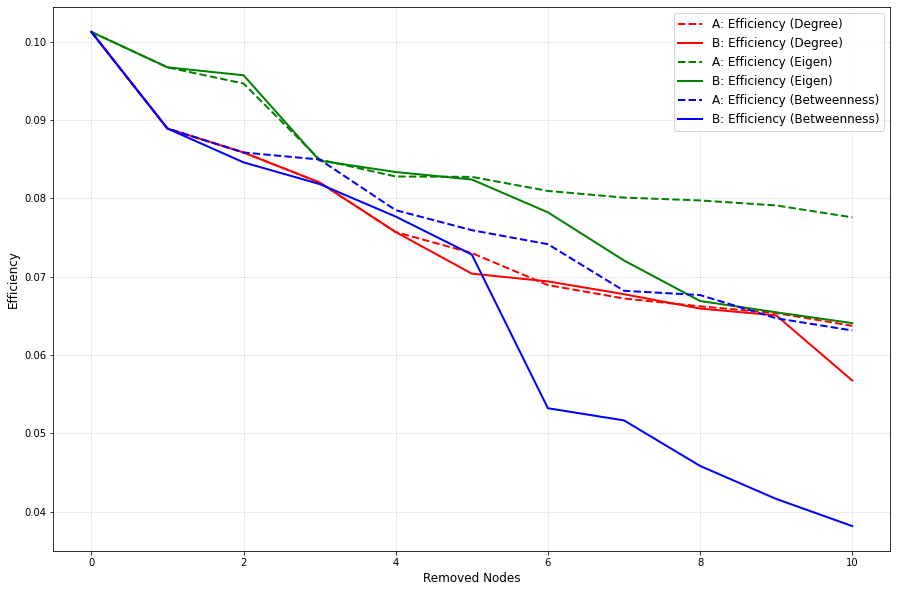

In [746]:
# Plot the eff result
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Removed Nodes', fontsize = 12)
ax.set_ylabel('Efficiency', fontsize = 12)


# degree
ax.plot(df_A.index, df_A['Efficiency_deg'], color='red', linestyle='--', linewidth=2, label='A: Efficiency (Degree)')
ax.plot(df_B.index, df_B['Efficiency_deg'], color='red', linestyle='-', linewidth=2, label='B: Efficiency (Degree)')

# eigen
ax.plot(df_A.index, df_A['Efficiency_eig'], color='green', linestyle='--', linewidth=2, label='A: Efficiency (Eigen)')
ax.plot(df_B.index, df_B['Efficiency_eig'], color='green', linestyle='-', linewidth=2, label='B: Efficiency (Eigen)')

# bet
ax.plot(df_A.index, df_A['Efficiency_bet'], color='blue', linestyle='--', linewidth=2, label='A: Efficiency (Betweenness)')
ax.plot(df_B.index, df_B['Efficiency_bet'], color='blue', linestyle='-', linewidth=2, label='B: Efficiency (Betweenness)')


ax.tick_params(axis='y')

# 添加图例和网格
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()


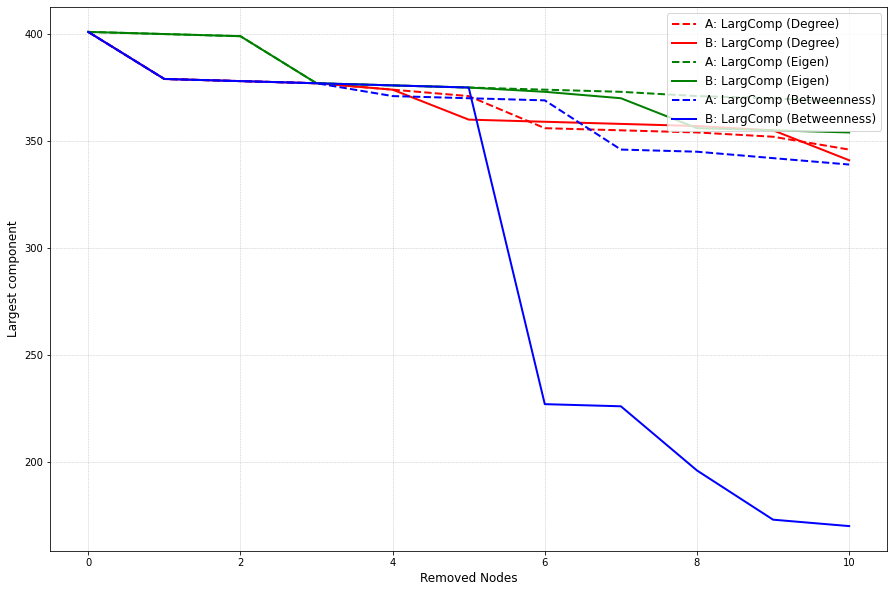

In [741]:
# Plot the component result
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlabel('Removed Nodes', fontsize = 12)
ax.set_ylabel('Largest component', fontsize = 12)


# degree
ax.plot(df_A.index, df_A['LargestC_deg'], color='red', linestyle='--', linewidth=2, label='A: LargComp (Degree)')
ax.plot(df_B.index, df_B['LargestC_deg'], color='red', linestyle='-', linewidth=2, label='B: LargComp (Degree)')

# eigen
ax.plot(df_A.index, df_A['LargestC_eig'], color='green', linestyle='--', linewidth=2, label='A: LargComp (Eigen)')
ax.plot(df_B.index, df_B['LargestC_eig'], color='green', linestyle='-', linewidth=2, label='B: LargComp (Eigen)')

# bet
ax.plot(df_A.index, df_A['LargestC_bet'], color='blue', linestyle='--', linewidth=2, label='A: LargComp (Betweenness)')
ax.plot(df_B.index, df_B['LargestC_bet'], color='blue', linestyle='-', linewidth=2, label='B: LargComp (Betweenness)')


ax.tick_params(axis='y')

# 添加图例和网格
plt.legend(loc="upper right", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()


## 2.1 Weighted network

In [480]:
# set inv flow as a new attribute
inv_flow = {(e1, e2): 1/(flows + 0.0001) for e1, e2, flows in G.edges(data='flows')}


In [633]:
nx.set_edge_attributes(G,inv_flow,'inv_flow')
list(G.edges(data = True))[0:10]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'inv_flow': 8.093233990828472e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'inv_flow': 0.0001482799503517208}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'inv_flow': 2.7321657803552753e-05}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'inv_flow': 1.8110692520083506e-05}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'inv_flow': 0.00010616838192835353}),
 ('Queensbury',
  'Canons Park',
  {'length': 1693.307343195774,
   'line_name': 'Jubilee',
   'flows': 6385,
   'inv_flow': 0.00015661706880787675}),
 ('Canons Park',
  'Stanmore',
  {'length': 1419.6694762456716,
   'line_name

In [634]:
# 
eig_flow_w = nx.eigenvector_centrality_numpy(G, weight='inv_flow')

nx.set_node_attributes(G, eig_flow_w,'eigenvector')

flow_eig_w = pd.DataFrame.from_dict(eig_flow_w, columns=['eigenvector'], orient='index').sort_values(by='eigenvector', ascending=False)

flow_eig_w.head(10)

,eigenvector
Nine Elms,7.071068e-01
Kennington,5.000000e-01
Battersea Power Station,5.000000e-01
Elephant & Castle,1.885518e-09
Oval,5.458345e-10
Waterloo,5.342946e-10
Lambeth North,1.434183e-15
North Ealing,4.163336e-17
Leyton,4.163336e-17
Hackney Central,2.775558e-17


In [467]:
flow_eig_w.to_csv('flow_eig_w.csv')

In [635]:
bet_flow_w = nx.betweenness_centrality(G, normalized=False, weight='inv_flow', seed=100)

nx.set_node_attributes(G, bet_flow_w, 'betweenness_w')

flow_bet_w = pd.DataFrame.from_dict(bet_flow_w, columns=['betweenness'], orient='index').sort_values(by='betweenness', ascending=False)

flow_bet_w.head(10)

,betweenness
Green Park,45690.0
Bank and Monument,40322.0
Waterloo,33231.0
Westminster,30433.0
Liverpool Street,26878.0
Stratford,26437.0
Bond Street,23288.0
Euston,22682.0
Oxford Circus,21607.0
Warren Street,20292.0


In [491]:
flow_bet_w.to_csv('flow_bet_w.csv')

In [495]:
bet_rank_w = flow_bet_w[:3]
bet_rank_w.index.tolist()

['Green Park', 'Bank and Monument', 'Waterloo']

In [556]:
inv_flow_bet_w = pd.DataFrame.from_dict(G.edges(data = 'inv_flow'))
inv_flow_bet_w.rename({0:'origin', 1:'destination', 2:'inv flow'}, axis=1, inplace=True)

In [625]:
data_w = {'Removed node': [], 'Efficiency': [], 'Connectivity': []}

In [647]:
all_pairs_lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight='inv_flow'))
len(all_pairs_lengths)

401

In [650]:

def eff_path_w_dj(G):
    
    # 使用 networkx 计算所有节点对之间的最短路径长度
    all_pairs_lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight='inv_flow'))
    
    # 初始化距离和
    sum_inv = 0
    sum_path = 0
    n_nodes = len(G.nodes())
    
    # 遍历所有节点对，计算逆距离和
    for source, lengths in all_pairs_lengths.items():
        for target, dist in lengths.items():
            if source != target:  # 排除节点自身
                sum_inv += 1 / dist
                sum_path += dist
                #pair_count += 1

    n_pairs = n_nodes * (n_nodes - 1) / 2
    
    # 如果有可到达的节点对，则计算全局效率
    if n_pairs > 0:
        eff_w = sum_inv / n_pairs /2
        path_w = sum_path / n_pairs / 2
    else:
        eff_w = 0 
        path_w = 0

    return eff_w, path_w


In [618]:
eff_path_w_dj(G)

(5297.442352118037, 398.5053636307039)

In [640]:

def non_seq_centrality_w(G):    
      df = pd.DataFrame(data_w)
      G_w = G.copy()
      sort_list_bet_w = []
      eff_list_bet_w = []
      short_path = []
      
      for n in range(3):
              if n == 0:
                   print('Origin glob eff and connectivity are: ' + str(eff_path_w_dj(G_w)))

              # calculate the list of bet centrality value
              betweenness_w_values=[(i[1]['betweenness_w']) for i in G_w.nodes(data=True)]

              #To remove nodes: 
              #If we want to remove the node with the max value of betweenness centrality:
              maxbet=[n for n in G_w.nodes() if G_w.nodes[n]['betweenness_w'] == max(betweenness_w_values)]

              #To remove nodes:
              G_w.remove_node(maxbet[0])
              
              # re-calculate the eff and connectivity
              efficiency, path_w = eff_path_w_dj(G_w)
              
              # 更新DataFrame
              sort_list_bet_w.append(maxbet[0])
              eff_list_bet_w.append(efficiency)
              short_path.append(path_w)
              print('removed node is ' + str(maxbet[0]))


      df['Removed node'] = sort_list_bet_w
      df['Efficiency'] = eff_list_bet_w
      df['Connectivity'] = short_path

      return df


In [641]:
def seq_centrality_w(G):    
      df = pd.DataFrame(data_w)
      G_w = G.copy()
      sort_list_bet_w = []
      eff_list_bet_w = []
      short_path = []
      
      for n in range(3):
              if n == 0:
                   print('Origin glob eff is: ' + str(eff_path_w_dj(G_w)))
        

              # calculate the centrality
              bet_flow_w = nx.betweenness_centrality(G_w, normalized=False, weight='inv_flow', seed=100)
              nx.set_node_attributes(G_w, bet_flow_w, 'betweenness_w')

              # calculate the list of bet centrality value
              seq_betweenness_w_val=[(i[1]['betweenness_w']) for i in G_w.nodes(data=True)]

              #To remove nodes with max centrality
              maxbet=[n for n in G_w.nodes() if G_w.nodes[n]['betweenness_w'] == max(seq_betweenness_w_val)]

              #To remove nodes:
              G_w.remove_node(maxbet[0])
              
              # 计算新图的全局效率
              efficiency, path_w = eff_path_w_dj(G_w)
              
              # 更新DataFrame
              sort_list_bet_w.append(maxbet[0])
              eff_list_bet_w.append(efficiency)
              short_path.append(path_w)
              print('removed node is ' + str(maxbet[0]))


      df['Removed node'] = sort_list_bet_w
      df['Efficiency'] = eff_list_bet_w
      df['Connectivity'] = short_path

      return df

In [651]:

df_bet_wA = non_seq_centrality_w(G)
df_bet_wA

Origin glob eff and connectivity are: (2648.7211760590185, 199.25268181535196)
removed node is Green Park
removed node is Bank and Monument
removed node is Waterloo


,Removed node,Efficiency,Connectivity
0,Green Park,2387.102342,199.750213
1,Bank and Monument,2062.541002,200.250257
2,Waterloo,1970.779088,200.752835


In [652]:
df_bet_wB = seq_centrality_w(G)
df_bet_wB

Origin glob eff is: (2648.7211760590185, 199.25268181535196)
removed node is Green Park
removed node is Bank and Monument
removed node is King's Cross St. Pancras


,Removed node,Efficiency,Connectivity
0,Green Park,2387.102342,199.750213
1,Bank and Monument,2062.541002,200.250257
2,King's Cross St. Pancras,1699.797693,200.752919


## Spatial interaction model

In [3]:
import numpy as np

In [12]:
# Read in the edgelist file from csv
nw = pd.read_csv("london_flows.csv")

# The populations are for the origin, and the jobs are for the dest
nw.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [3]:
# check the total flows
sum(nw['flows'])

1542391

In [13]:
nw = nw[nw['distance'] != 0].reindex()
nw.loc[nw['jobs'] == 0, 'jobs'] += 0.0001
nw.loc[nw['population'] == 0, 'population'] += 0.0001

In [1]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
# the flows are origin flows
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    nw[f"log_{x}"] = np.log(nw[x])
    log_x_vars.append(f"log_{x}")


In [19]:
#create the formula for inverse power distance
sigcon_pow_form = 'flows ~ station_origin + log_jobs + log_distance'

#run the regression
sigcosim_pow = smf.glm(formula = sigcon_pow_form, 
                  data=nw, 
                  family=sm.families.Poisson()).fit()

In [20]:
#create the formula for neg exp distance
sigcon_ex_form = 'flows ~ station_origin + log_jobs + distance'

#run the regression
sigcosim_ex = smf.glm(formula = sigcon_ex_form, 
                  data=nw, 
                  family=sm.families.Poisson()).fit()

In [21]:
#round the numbers so that we don't get a half of a person
nw["sigconstrainedEst_pow"] = np.round(sigcosim_pow.mu)
nw['sigconstrainedEst_ex'] = np.round(sigcosim_ex.mu)

#convert to integers
nw["sigconstrainedEst_pow"] = nw["sigconstrainedEst_pow"].astype(int)
nw["sigconstrainedEst_ex"] = nw["sigconstrainedEst_ex"].astype(int)

#check that the sum of these estimates make sense
print('sigcon inv power flows = ')
print(sum(nw["sigconstrainedEst_pow"]))
#calculate R2
print('R2 = ')
print(CalcRSqaured(nw["flows"], nw["sigconstrainedEst_pow"]))
#Calculate RMSE
print('RMSE = ')
print(CalcRMSE(nw["flows"], nw["sigconstrainedEst_pow"]))

print('sigcon neg exp flows = ')
print(sum(nw["sigconstrainedEst_ex"]))
print('R2 = ')
print(CalcRSqaured(nw["flows"], nw["sigconstrainedEst_ex"]))
#Calculate RMSE
print('RMSE = ')
print(CalcRMSE(nw["flows"], nw["sigconstrainedEst_ex"]))

print('origin flows = ')
print(sum(nw["flows"]))

sigcon inv power flows = 
1541806
R2 = 
0.38829196662967047
RMSE = 
102.857
sigcon neg exp flows = 
1541347
R2 = 
0.46807815299511274
RMSE = 
96.229
origin flows = 
1542283


In [753]:

#create the formula (the "-1" indicates no intercept in the regression model).
prod_formula = 'flows ~ station_origin + log_jobs + distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = prod_formula, data=nw, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

# gama is the coef for log_jobs (0.7552), -beta is the coef for distance (-0.0002)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.0994e+05
Date:                Sun, 21 Apr 2024   Deviance:                   1.6477e+06
Time:                        19:06:39   Pearson chi2:                 2.40e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [754]:
nw["prodsimest1"] = np.round(prodSim.mu, 0)
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
nw.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodsimest1
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,78.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,4.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,99.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,56.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,4.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,5.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,4.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,3.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,4.0


In [296]:
# 检查模型拟合情况
#calculate R2
print('R2 = ')
print(CalcRSqaured(nw["flows"], nw["prodsimest1"]))
#Calculate RMSE
print('RMSE = ')
print(CalcRMSE(nw["flows"], nw["prodsimest1"]))


R2 = 
0.46807815299511274
RMSE = 
96.229


In [297]:
print('sum of origin flows = ')
print(sum(nw['flows']))

print('sum of predicted production flows = ')
print(sum(nw['prodsimest1']))

sum of origin flows = 
1542283
sum of predicted production flows = 
1541347.0


In [755]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(nw.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
nw = nw.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(nw.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
nw = nw.merge(D_j, on = "station_destination", how = "left" )


In [756]:
alpha_i_prod = prodSim.params[0:399]
gamma_prod = prodSim.params[399]
beta_prod = -prodSim.params[400]

In [757]:
#We can do this by pulling out the parameter values
# 这里生成的alpha_i是用prod-constrained mode，通过原始数据生成的。
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
#then once you have done this you can join them back into the dataframes
nw = nw.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
nw.drop(columns = ["coef"], inplace = True)
#check this has worked
nw.head()

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodsimest1,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,78.0,599,78549,-2.914322
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,599,442,-2.914322
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,4.0,599,665,-2.914322
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,99.0,599,58772,-2.914322
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,56.0,599,15428,-2.914322


### Scenario A, job decrease 50% in Canary Wharf

In [758]:
def dec_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["jobs"] * 0.5
    else:
        val = row["jobs"]
    return val

In [759]:

# 改变了目的地的薪资，表明目的地变得更有吸引力，则预期流入该地的流量会更大。
nw["DjA_jobs"] = nw.apply(dec_job, axis =1)
nw.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodsimest1,O_i,D_j,alpha_i,DjA_jobs
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,78.0,599,78549,-2.914322,78549.0
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,599,442,-2.914322,442.0
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,4.0,599,665,-2.914322,665.0
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,99.0,599,58772,-2.914322,29386.0
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,56.0,599,15428,-2.914322,15428.0
5,Abbey Road,Crossharbour,1,599.0,1208.0,6686.475560,6.395262,7.096721,8.807842,4.0,599,1208,-2.914322,1208.0
6,Abbey Road,Custom House,0,599.0,845.0,3824.855630,6.395262,6.739337,8.249276,5.0,599,845,-2.914322,845.0
7,Abbey Road,Cutty Sark,2,599.0,1748.0,8503.898909,6.395262,7.466228,9.048280,4.0,599,1748,-2.914322,1748.0
8,Abbey Road,Cyprus,7,599.0,850.0,6532.099618,6.395262,6.745236,8.784484,3.0,599,850,-2.914322,850.0
9,Abbey Road,Devons Road,1,599.0,611.0,3958.324171,6.395262,6.415097,8.283576,4.0,599,611,-2.914322,611.0


In [760]:
# 检查jobs改变的行
nw[nw['station_destination'] == 'Canary Wharf'][['station_origin', 'station_destination', 'jobs', 'DjA_jobs']]

,station_origin,station_destination,jobs,DjA_jobs
3,Abbey Road,Canary Wharf,58772.0,29386.0
126,Acton Town,Canary Wharf,58772.0,29386.0
348,Aldgate,Canary Wharf,58772.0,29386.0
595,Aldgate East,Canary Wharf,58772.0,29386.0
817,All Saints,Canary Wharf,58772.0,29386.0
...,...,...,...,...
60577,Wood Green,Canary Wharf,58772.0,29386.0
60820,Wood Lane,Canary Wharf,58772.0,29386.0
61044,Woodford,Canary Wharf,58772.0,29386.0
61276,Woodside Park,Canary Wharf,58772.0,29386.0


In [761]:
dist_decay = np.exp(nw['distance'] * (-beta_prod))

In [762]:
# apply product-constraint model on Scenario A

# 改变jobs之后，对Ai进行重新计算。

#calculate some new wj^alpha and d_ij^beta values
DjA_gamma = nw["DjA_jobs"]**gamma_prod
#calcualte the first stage of the Ai values
nw["Ai_A"] = DjA_gamma * dist_decay
#now do the sum over all js bit
A_i = pd.DataFrame(nw.groupby(["station_origin"])["Ai_A"].agg(np.sum))
#now divide into 1
A_i["Ai_A"] = 1/A_i["Ai_A"]
A_i.rename(columns={"Ai_A":"A_iA"}, inplace=True)
#and write the A_i values back into the dataframe
nw = nw.merge(A_i, left_on="station_origin", right_index=True, how="left")

nw = nw.drop('Ai_A', axis = 1)
nw

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,prodsimest1,O_i,D_j,alpha_i,DjA_jobs,A_iA
0,Abbey Road,Bank and Monument,0,599.0,78549.0,8131.525097,6.395262,11.271478,9.003504,78.0,599,78549,-2.914322,78549.0,0.000097
1,Abbey Road,Beckton,1,599.0,442.0,8510.121774,6.395262,6.091310,9.049012,1.0,599,442,-2.914322,442.0,0.000097
2,Abbey Road,Blackwall,3,599.0,665.0,3775.448872,6.395262,6.499787,8.236275,4.0,599,665,-2.914322,665.0,0.000097
3,Abbey Road,Canary Wharf,1,599.0,58772.0,5086.514220,6.395262,10.981421,8.534348,99.0,599,58772,-2.914322,29386.0,0.000097
4,Abbey Road,Canning Town,37,599.0,15428.0,2228.923167,6.395262,9.643939,7.709274,56.0,599,15428,-2.914322,15428.0,0.000097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892.0,3342.0,13401.795549,8.973605,8.114325,9.503144,99.0,7892,3342,0.518041,3342.0,0.000230
61452,Woolwich Arsenal,West Ham,608,7892.0,5487.0,8701.454361,8.973605,8.610137,9.071245,295.0,7892,5487,0.518041,5487.0,0.000230
61453,Woolwich Arsenal,West India Quay,6,7892.0,400.0,9536.720451,8.973605,5.991465,9.162905,36.0,7892,400,0.518041,400.0,0.000230
61454,Woolwich Arsenal,West Silvertown,81,7892.0,893.0,5355.248554,8.973605,6.794587,8.585832,125.0,7892,893,0.518041,893.0,0.000230


In [763]:
# 计算改变jobs之后的flow预测值
nw["prodsimestA"] = nw["A_iA"] * nw['O_i']* DjA_gamma * dist_decay

nw["prodsimestA"] = round(nw["prodsimestA"],0)
nw["prodsimest1"] = round(nw["prodsimest1"],0)

nw[['prodsimest1', 'prodsimestA']].head(20)

,prodsimest1,prodsimestA
0,78.0,83.0
1,1.0,2.0
2,4.0,4.0
3,99.0,63.0
4,56.0,60.0
5,4.0,4.0
6,5.0,5.0
7,4.0,4.0
8,3.0,3.0
9,4.0,4.0


In [309]:
print(sum(nw['prodsimest1']))
print(sum(nw['prodsimestA']))


1541347.0
1541397.0


In [311]:
# 计算流量降低的百分比，并排序。
nw['A_flow_dec'] = round((nw['prodsimest1'] - nw['prodsimestA']) / nw['prodsimest1'], 2)
nw['A_flow_dec_number'] = nw['prodsimest1'] - nw['prodsimestA']

nw_sortedperc_A = nw.sort_values('A_flow_dec', ascending=False)[['station_origin', 'station_destination', 'A_flow_dec', 'A_flow_dec_number', 'flows', 'distance', 'population', 'prodsimest1']]
nw_sortednumber_A = nw.sort_values('A_flow_dec_number', ascending=False)[['station_origin', 'station_destination',  'A_flow_dec_number', 'A_flow_dec', 'flows', 'distance', 'population', 'prodsimest1']]

In [312]:
nw_sortedperc_A.head(10)

,station_origin,station_destination,A_flow_dec,A_flow_dec_number,flows,distance,population,prodsimest1
11248,Chorleywood,Canary Wharf,0.50,3.0,35,43009.122237,900.0,6.0
36219,North Ealing,Canary Wharf,0.50,3.0,5,22349.197165,505.0,6.0
50992,Temple,Canary Wharf,0.50,4.0,7,7377.218946,349.0,8.0
10787,Chesham,Canary Wharf,0.50,2.0,19,52837.911917,932.0,4.0
27517,Hyde Park Corner,Canary Wharf,0.50,2.0,8,10488.015271,259.0,4.0
39434,Park Royal,Canary Wharf,0.50,3.0,3,23448.855616,559.0,6.0
46168,South Harrow,Canary Wharf,0.45,5.0,9,30134.133382,1516.0,11.0
50338,Sudbury Hill,Canary Wharf,0.45,5.0,11,28648.667723,1337.0,11.0
37481,Northwood,Canary Wharf,0.44,7.0,99,33842.250426,2027.0,16.0
58030,West Harrow,Canary Wharf,0.44,4.0,29,27841.417506,1021.0,9.0


In [313]:
nw_sortedperc_A.to_csv('nw_sortedperc_A.csv')

In [314]:
nw_sortednumber_A.head(10)

,station_origin,station_destination,A_flow_dec_number,A_flow_dec,flows,distance,population,prodsimest1
49932,Stratford,Canary Wharf,1186.0,0.40,3875,5482.674320,59311.0,3002.0
31698,Lewisham,Canary Wharf,673.0,0.34,1920,6126.937274,7868.0,1981.0
9149,Canning Town,Canary Wharf,642.0,0.39,1258,2857.591052,21125.0,1655.0
8541,Canada Water,Canary Wharf,637.0,0.39,4030,2601.866276,27026.0,1623.0
55957,Waterloo,Canary Wharf,564.0,0.40,8085,7433.985750,67372.0,1400.0
61424,Woolwich Arsenal,Canary Wharf,531.0,0.36,82,9863.964667,7892.0,1481.0
36352,North Greenwich,Canary Wharf,435.0,0.38,1616,1829.783291,10931.0,1140.0
32267,Limehouse,Canary Wharf,422.0,0.35,627,1877.817231,5348.0,1217.0
32642,London Bridge,Canary Wharf,370.0,0.40,6165,5679.209735,32597.0,923.0
32344,Liverpool Street,Canary Wharf,341.0,0.40,24,6093.864865,31473.0,850.0


In [315]:
nw_sortednumber_A.to_csv('nw_sortednumber_A.csv')

In [316]:
# 计算流量升高的百分比，并排序。
nw['A_flow_inc'] = (nw['prodsimestA'] - nw['prodsimest1']) / nw['prodsimest1']
nw['A_flow_inc_number'] = nw['prodsimestA'] - nw['prodsimest1']

nw_sortedperc_A_inc = nw.sort_values('A_flow_inc', ascending=False)[['station_origin', 'station_destination', 'A_flow_inc', 'A_flow_inc_number', 'prodsimest1']]
nw_sortednumber_A_inc = nw.sort_values('A_flow_inc_number', ascending=False)[['station_origin', 'station_destination', 'A_flow_inc_number', 'A_flow_inc', 'prodsimest1']]

In [317]:
nw_sortednumber_A_inc.head(10)

,station_origin,station_destination,A_flow_inc_number,A_flow_inc,prodsimest1
31693,Lewisham,Bank and Monument,124.0,0.114815,1080.0
32262,Limehouse,Bank and Monument,121.0,0.102542,1180.0
61448,Woolwich Arsenal,Stratford,109.0,0.082576,1320.0
31726,Lewisham,Stratford,94.0,0.114078,824.0
61419,Woolwich Arsenal,Bank and Monument,75.0,0.081967,915.0
61425,Woolwich Arsenal,Canning Town,69.0,0.082536,836.0
44775,Shadwell,Bank and Monument,69.0,0.056052,1231.0
50306,Stratford International,Stratford,60.0,0.071685,837.0
32295,Limehouse,Stratford,59.0,0.102967,573.0
49895,Stratford,Bank and Monument,57.0,0.020902,2727.0


In [318]:
nw_sortednumber_A_inc.to_csv('nw_sortednumber_A_inc.csv')

### Assess scenario B by production constrained model

In [764]:
# 对Ai重新计算, 1.5beta

dist_decay1_5 = np.exp(nw['distance'] * (-1.5 *beta_prod))

#calculate some new wj^alpha and d_ij^beta values
DjB1_gamma = nw["jobs"]**gamma_prod
#calcualte the first stage of the Ai values
nw["Ai_B1"] = DjB1_gamma * dist_decay1_5
#now do the sum over all js bit
A_iB1 = pd.DataFrame(nw.groupby(["station_origin"])["Ai_B1"].agg(np.sum))
#now divide into 1
A_iB1["Ai_B1"] = 1/A_iB1["Ai_B1"]
A_iB1.rename(columns={"Ai_B1":"A_iB1"}, inplace=True)
#and write the A_i values back into the dataframe
nw = nw.merge(A_iB1, left_on="station_origin", right_index=True, how="left")

nw = nw.drop('Ai_B1', axis=1)

In [765]:
# 对Ai重新计算, 2beta

dist_decay2 = np.exp(nw['distance'] * (-2 *beta_prod))

#calculate some new wj^alpha and d_ij^beta values
DjB2_gamma = nw["jobs"]**gamma_prod
#calcualte the first stage of the Ai values
nw["Ai_B2"] = DjB2_gamma * dist_decay2
#now do the sum over all js bit
A_iB2 = pd.DataFrame(nw.groupby(["station_origin"])["Ai_B2"].agg(np.sum))
#now divide into 1
A_iB2["Ai_B2"] = 1/A_iB2["Ai_B2"]
A_iB2.rename(columns={"Ai_B2":"A_iB2"}, inplace=True)
#and write the A_i values back into the dataframe
nw = nw.merge(A_iB2, left_on="station_origin", right_index=True, how="left")

nw = nw.drop('Ai_B2', axis=1)

In [766]:
# flow B1
nw["prodsimestB1"] = nw["A_iB1"] * nw['O_i']* DjB1_gamma * dist_decay1_5
nw["prodsimestB1"] = round(nw["prodsimestB1"])

# flow B2
nw["prodsimestB2"] = nw["A_iB2"] * nw['O_i']* DjB2_gamma * dist_decay2
nw["prodsimestB2"] = round(nw["prodsimestB2"])

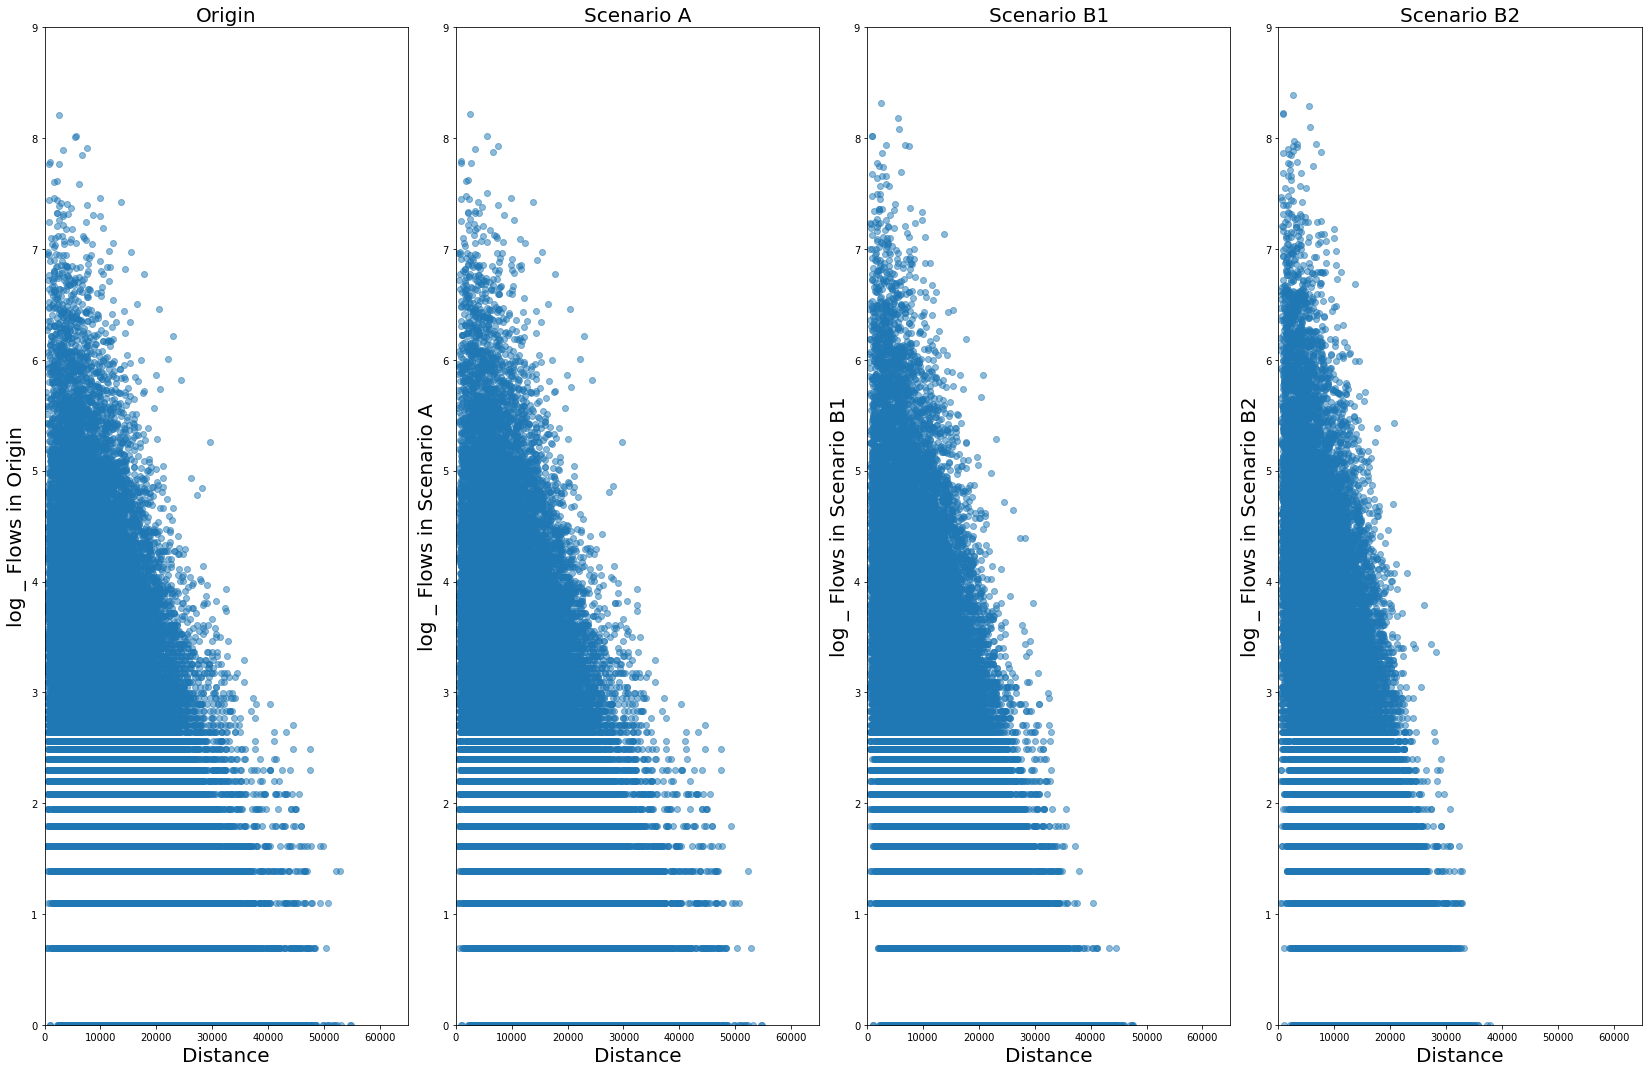

In [388]:
# 设置基础轴
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(23, 15))  # 创建3个子图，垂直排列

#axis limits
xlimit = (0, 65000)
ylimit = (0, 9)

# 原始图
ax0.scatter(x = nw["distance"], y=np.log(nw["prodsimest1"]), alpha=0.5)
ax0.set_xlabel("Distance", fontsize = 20)
ax0.set_ylabel("log _ Flows in Origin", fontsize = 20)
ax0.set_title('Origin', fontsize = 20)
ax0.set_xlim(xlimit)
ax0.set_ylim(ylimit)

# 第一幅散点图
ax1.scatter(x = nw["distance"], y=np.log(nw["prodsimestA"]), alpha=0.5)
ax1.set_xlabel("Distance", fontsize = 20)
ax1.set_ylabel("log _ Flows in Scenario A", fontsize = 20)
ax1.set_title('Scenario A', fontsize = 20)
ax1.set_xlim(xlimit)
ax1.set_ylim(ylimit)

# 第二幅散点图
ax2.scatter(x = nw["distance"], y=np.log(nw["prodsimestB1"]), alpha=0.5)
ax2.set_xlabel("Distance", fontsize = 20)
ax2.set_ylabel("log _ Flows in Scenario B1", fontsize = 20)
ax2.set_title('Scenario B1', fontsize = 20)
ax2.set_xlim(xlimit)
ax2.set_ylim(ylimit)

# 第三幅散点图
ax3.scatter(x = nw["distance"], y=np.log(nw["prodsimestB2"]), alpha=0.5)
ax3.set_xlabel("Distance", fontsize = 20)
ax3.set_ylabel("log _ Flows in Scenario B2", fontsize = 20)
ax3.set_title('Scenario B2', fontsize = 20)
ax3.set_xlim(xlimit)
ax3.set_ylim(ylimit)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


In [391]:
distrbute = pd.DataFrame(nw[['prodsimest1','prodsimestA', 'prodsimestB1', 'prodsimestB2']].describe())

In [392]:
distrbute.to_csv('distrbute.csv')

In [401]:
sum(nw['prodsimest1'])
sum(nw['prodsimestA'])
sum(nw['prodsimestB1'])
sum(nw['prodsimestB2'])

1541347.0

In [767]:
nw_res = nw[['station_origin', 'station_destination', 'distance', 'prodsimest1', 'prodsimestA', 'prodsimestB1', 'prodsimestB2', 'O_i', 'D_j']]

In [412]:
D_j1 = pd.DataFrame(nw.groupby(["station_destination"])["prodsimest1"].agg(np.sum))
D_j1.rename(columns={"prodsimest1":"D_j1"}, inplace = True)
nw_res = nw_res.merge(D_j1, on = "station_destination", how = "left" )

In [408]:
D_jA = pd.DataFrame(nw.groupby(["station_destination"])["prodsimestA"].agg(np.sum))
D_jA.rename(columns={"prodsimestA":"D_jA"}, inplace = True)
nw_res = nw_res.merge(D_jA, on = "station_destination", how = "left" )

In [410]:
D_jB1 = pd.DataFrame(nw.groupby(["station_destination"])["prodsimestB1"].agg(np.sum))
D_jB1.rename(columns={"prodsimestB1":"D_jB1"}, inplace = True)
nw_res = nw_res.merge(D_jB1, on = "station_destination", how = "left" )

D_jB2 = pd.DataFrame(nw.groupby(["station_destination"])["prodsimestB2"].agg(np.sum))
D_jB2.rename(columns={"prodsimestB2":"D_jB2"}, inplace = True)
nw_res = nw_res.merge(D_jB2, on = "station_destination", how = "left" )

In [425]:
nw_res_fil = nw_res[(nw_res['prodsimest1'] != 0) | (nw_res['prodsimestA'] != 0) | (nw_res['prodsimestB1'] != 0) | (nw_res['prodsimestB2'] != 0)]

In [427]:
nw_res.shape

(61456, 9)

In [428]:
nw_res_fil.shape

(52476, 9)

In [415]:
print(sum(nw_res['D_j1']))
print(sum(nw_res['D_jA']))
print(sum(nw_res['D_jB1']))
print(sum(nw_res['D_jB2']))

385371842.0
384134556.0
379920080.0
373269753.0


In [417]:
print((sum(nw_res['D_j1']) - sum(nw_res['D_jA'])) / sum(nw_res['D_j1']) * 100)
print((sum(nw_res['D_j1']) - sum(nw_res['D_jB1'])) / sum(nw_res['D_j1']) * 100)
print((sum(nw_res['D_j1']) - sum(nw_res['D_jB2'])) / sum(nw_res['D_j1']) * 100)

0.32106289696173496
1.414675751011409
3.1403667006890448


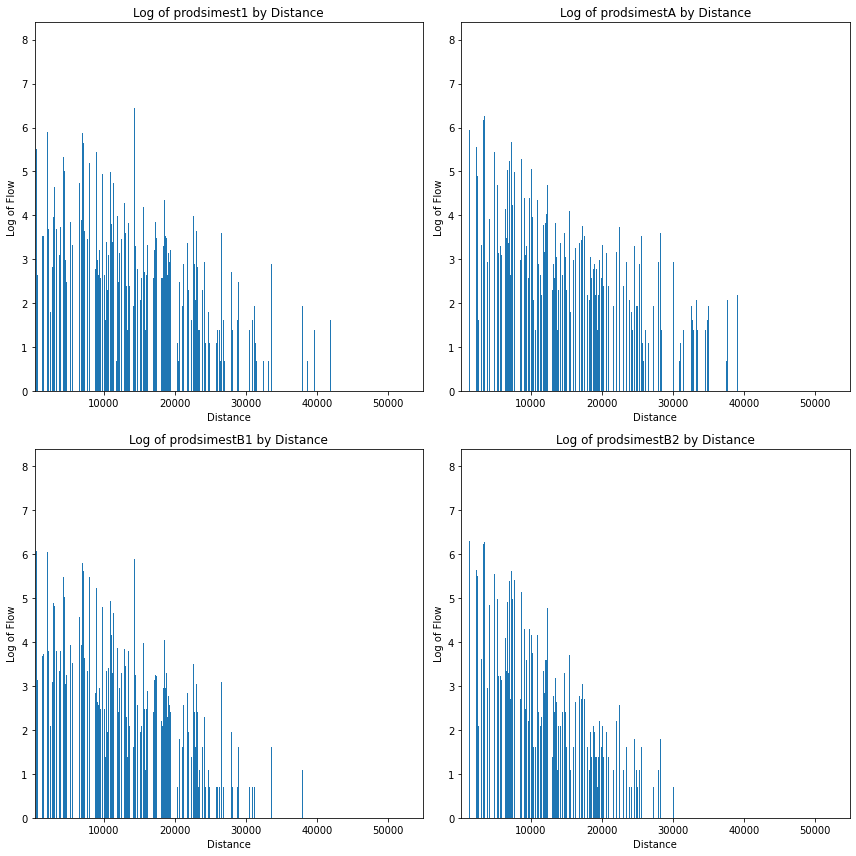

In [430]:

# 计算对数流量的全局最大和最小值
log_flows = np.log(nw_res_fil[['prodsimest1', 'prodsimestA', 'prodsimestB1', 'prodsimestB2']] + 1)
global_min = log_flows.min().min()
global_max = log_flows.max().max()
xglobal_min = nw_res_fil['distance'].min()
xglobal_max = nw_res_fil['distance'].max()

# 创建一个2x2的子图布局
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# 子图1
axs[0, 0].bar(nw_res_fil['distance'], np.log(nw_res_fil['prodsimest1'] + 1))
axs[0, 0].set_title('Log of prodsimest1 by Distance')
axs[0, 0].set_xlabel('Distance')
axs[0, 0].set_ylabel('Log of Flow')
axs[0, 0].set_ylim(global_min, global_max)
axs[0, 0].set_xlim(xglobal_min, xglobal_max)

# 子图2
axs[0, 1].bar(nw_res_fil['distance'], np.log(nw_res_fil['prodsimestA'] + 1))
axs[0, 1].set_title('Log of prodsimestA by Distance')
axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Log of Flow')
axs[0, 1].set_ylim(global_min, global_max)
axs[0, 1].set_xlim(xglobal_min, xglobal_max)

# 子图3
axs[1, 0].bar(nw_res_fil['distance'], np.log(nw_res_fil['prodsimestB1'] + 1))
axs[1, 0].set_title('Log of prodsimestB1 by Distance')
axs[1, 0].set_xlabel('Distance')
axs[1, 0].set_ylabel('Log of Flow')
axs[1, 0].set_ylim(global_min, global_max)
axs[1, 0].set_xlim(xglobal_min, xglobal_max)

# 子图4
axs[1, 1].bar(nw_res_fil['distance'], np.log(nw_res_fil['prodsimestB2'] + 1))
axs[1, 1].set_title('Log of prodsimestB2 by Distance')
axs[1, 1].set_xlabel('Distance')
axs[1, 1].set_ylabel('Log of Flow')
axs[1, 1].set_ylim(global_min, global_max)
axs[1, 1].set_xlim(xglobal_min, xglobal_max)

# 调整子图
plt.tight_layout()
plt.show()

In [431]:
nw_res

,station_origin,station_destination,distance,prodsimest1,prodsimestA,prodsimestB1,prodsimestB2,O_i,D_j
0,Abbey Road,Bank and Monument,8131.525097,78.0,83.0,55.0,37.0,599,78549
1,Abbey Road,Beckton,8510.121774,1.0,2.0,1.0,1.0,599,442
2,Abbey Road,Blackwall,3775.448872,4.0,4.0,4.0,4.0,599,665
3,Abbey Road,Canary Wharf,5086.514220,99.0,63.0,89.0,76.0,599,58772
4,Abbey Road,Canning Town,2228.923167,56.0,60.0,62.0,66.0,599,15428
...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,13401.795549,99.0,107.0,73.0,51.0,7892,3342
61452,Woolwich Arsenal,West Ham,8701.454361,295.0,320.0,311.0,312.0,7892,5487
61453,Woolwich Arsenal,West India Quay,9536.720451,36.0,39.0,36.0,33.0,7892,400
61454,Woolwich Arsenal,West Silvertown,5355.248554,125.0,135.0,170.0,221.0,7892,893


In [770]:
# 1 - A redistribution
nw_res['1-A'] = (nw_res['prodsimest1'] - nw_res['prodsimestA']).abs()

# 1 - B1 redistribution
nw_res['1-B1'] = (nw_res['prodsimest1'] - nw_res['prodsimestB1']).abs()

# 1 - B2 redistribution
nw_res['1-B2'] = (nw_res['prodsimest1'] - nw_res['prodsimestB2']).abs()

<ipython-input-770-64670e00f4c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_res['1-A'] = (nw_res['prodsimest1'] - nw_res['prodsimestA']).abs()
<ipython-input-770-64670e00f4c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_res['1-B1'] = (nw_res['prodsimest1'] - nw_res['prodsimestB1']).abs()
<ipython-input-770-64670e00f4c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [771]:
nw_res['1-A'].describe()

count    61456.000000
mean         0.592847
std          9.442061
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1186.000000
Name: 1-A, dtype: float64

In [773]:
flow_change = pd.DataFrame(nw_res[['1-A','1-B1', '1-B2']].describe())
flow_change

,1-A,1-B1,1-B2
count,61456.000000,61456.000000,61456.000000
mean,0.592847,5.796668,11.211241
std,9.442061,19.381504,39.719356
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000
50%,0.000000,2.000000,3.000000
75%,0.000000,4.000000,8.000000
max,1186.000000,679.000000,1448.000000


In [774]:
flow_change.to_csv('flow_change.csv')